In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [ ]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://raw.githubusercontent.com/IanWhittemore657/Tensorflow/master/spam.csv


File ‘spam.csv’ already there; not retrieving.



In [ ]:
#use encoding when the df.head() returns an error of "utf-8 codec can't decode bytes in.."

df = pd.read_csv('spam.csv' ,encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Remove unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Rename columns to something better
df.columns = ['labels', 'data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [ ]:
#Split up the dataset
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [ ]:
#Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
#Map the word into an integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7158 unique tokens.


In [ ]:
#Pad sequences so that it gives a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

#Get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T) #the maxlen = T means that if they are longer than the maxsize 
#then it will be truncated
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [ ]:
# Create the model

#Choose embedding dimensionality
D = 20

#Hidden state dimensionality
M = 15

# Note: Want the the size of the embedding to be : (V + 1) x D,
# This is because the first index starts from 1, not 0.
# The Final index of the embedding matrix is V,
# Meaning that it actually must have size of V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [ ]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 2s 17ms/step - loss: 0.4551 - accuracy: 0.8690 - val_loss: 0.4038 - val_accuracy: 0.8597
Epoch 2/10
117/117 [==============================] - 2s 13ms/step - loss: 0.3848 - accuracy: 0.8690 - val_loss: 0.3979 - val_accuracy: 0.8597
Epoch 3/10
117/117 [==============================] - 2s 14ms/step - loss: 0.3698 - accuracy: 0.8690 - val_loss: 0.3689 - val_accuracy: 0.8597
Epoch 4/10
117/117 [==============================] - 2s 14ms/step - loss: 0.3143 - accuracy: 0.8690 - val_loss: 0.2921 - val_accuracy: 0.8597
Epoch 5/10
117/117 [==============================] - 2s 14ms/step - loss: 0.1860 - accuracy: 0.9237 - val_loss: 0.1489 - val_accuracy: 0.9636
Epoch 6/10
117/117 [==============================] - 2s 14ms/step - loss: 0.0647 - accuracy: 0.9904 - val_loss: 0.0791 - val_accuracy: 0.9810
Epoch 7/10
117/117 [==============================] - 2s 13ms/step - loss: 0.0331 - accuracy: 0.9962 - val_loss: 0.0663 - va

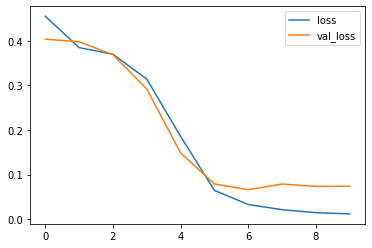

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

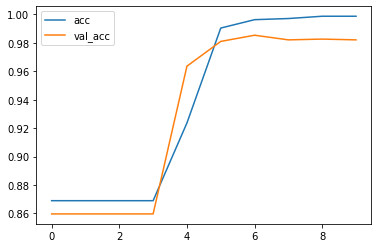

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()